In [ ]:
pip install stc

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

from stc import SparseTensorClassifier

from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

# **Import datasets**

In [ ]:
# Import the datasets previously produced containing BOW or other information
# about the data to elaborate retrieved from the IBM Debater dataset.
# Each dataset containg a particular category of data retrived.

# Import list of the sentences in the test set.
print('\nImport test_set_Debater_only_claim_or_only_premise.csv\n')
upload = files.upload()

# Import the labels of the sentences to classify.
print('\nImport Debater_claim_premise_labels.csv\n')
upload = files.upload()

# Import the statistics and positions information of the sentences to classify.
print('\nImport Debater_claim_premise_statistic.csv\n')
upload = files.upload()

# Import the BOW of the POS of the sentences to classify.
print('\nImport Debater_claim_premise_POS.csv\n')
upload = files.upload()

# Import the BOW of the simplyfied POS of the sentences to classify.
print('\nImport Debater_claim_premise_simple_POS.csv\n')
upload = files.upload()

# Import the BOW for the bigrams of the POS of the sentences to classify.
print('\nImport Debater_claim_premise_bigram_POS.csv\n')
upload = files.upload()

# Import the BOW for the bigrams of the simplyfied POS of the sentences to classify.
print('\nImport Debater_claim_premise_bigram_simple_POS.csv\n')
upload = files.upload()

# Import the BOW of the dependency tag of the sentences to classify.
print('\nImport Debater_claim_premise_dependency.csv\n')
upload = files.upload()

# Import the statistic relative to the tree of the dependency tag of the sentences to classify.
print('\nImport Debater_claim_premise_dependency_tree_stat.csv\n')
upload = files.upload()

# Import the BOW of the labeled named entity of the sentences to classify.
print('\nImport Debater_claim_premise_named_entity_BOW.csv\n')
upload = files.upload()

# Import the BOW of the sentences to classify.
print('\nImport Debater_claim_premise_BOW.csv\n')
upload = files.upload()

# Import the BOW for the bigrams of the sentences to classify.
print('\nImport Debater_claim_premise_Bigram.csv\n')
upload = files.upload()

# Import the BOW for secific n-grams of the sentences to classify.
print('\nImport Debater_claim_premise__BOW_appendix_words.csv\n')
upload = files.upload()

# Import the remaining statistics of the sentences to classify.
print('\nImport Debater_claim_premise__remaining_stat.csv\n')
upload = files.upload()


Import test_set_Debater_only_claim_or_only_premise.csv




Import Debater_claim_premise_labels.csv




Import Debater_claim_premise_statistic.csv




Import Debater_claim_premise_POS.csv




Import Debater_claim_premise_simple_POS.csv




Import Debater_claim_premise_bigram_POS.csv




Import Debater_claim_premise_bigram_simple_POS.csv




Import Debater_claim_premise_dependency.csv




Import Debater_claim_premise_dependency_tree_stat.csv




Import Debater_claim_premise_named_entity_BOW.csv




Import Debater_claim_premise_BOW.csv




Import Debater_claim_premise_Bigram.csv




Import Debater_claim_premise__BOW_appendix_words.csv




Import Debater_claim_premise__remaining_stat.csv



In [ ]:
# Read the datasets retrieved by the Stab and Gurevych dataset.

test_set=pd.read_csv("test_set_Debater_only_claim_or_only_premise.csv")

true_labels=pd.read_csv('Debater_claim_premise_labels.csv')

statistic=pd.read_csv('Debater_claim_premise_statistic.csv')

POS=pd.read_csv('Debater_claim_premise_POS.csv')

simple_POS=pd.read_csv('Debater_claim_premise_simple_POS.csv')

bigram_POS=pd.read_csv('Debater_claim_premise_bigram_POS.csv')

bigram_simple_POS=pd.read_csv('Debater_claim_premise_bigram_simple_POS.csv')

dependency=pd.read_csv('Debater_claim_premise_dependency.csv')

dependency_tree_stat=pd.read_csv('Debater_claim_premise_dependency_tree_stat.csv')

named_entity=pd.read_csv('Debater_claim_premise_named_entity_BOW.csv')

BOW=pd.read_csv('Debater_claim_premise_BOW.csv')

Bigram=pd.read_csv('Debater_claim_premise_Bigram.csv')

imported_ngram=pd.read_csv('Debater_claim_premise_BOW_appendix_words.csv')

others=pd.read_csv('Debater_claim_premise_remaining_stat.csv')

In [ ]:
# Rename the true_lable dataset column.
true_labels=true_labels.rename(columns={'0': 'argumentative'})
true_labels=true_labels.astype({'argumentative':'str'})

In [ ]:
# Remove data types that are not categorical.
statistic=statistic.drop(columns=['sentence length / media sentence length in essay'])
others=others.drop(columns=['type token ratio'])
statistic=statistic.round(0)
others=others.round(0)

In [ ]:
true_labels.shape[0]

2914

In [ ]:
true_labels['argumentative'][0]

'False'

In [ ]:
true_labels.head()

,argumentative
0,False
1,False
2,True
3,False
4,False


In [ ]:
statistic.iloc[0:1]

,paragraph in essay,sentence in paragraph,sentence in essay,total sentences in paragraph,total paragraphs in document,number words in sentence
0,8,1,17,3,86,49


In [ ]:
statistic.shape[1]

6

In [ ]:
others.shape[0]

2914

# **Remove sentence from the test set (only Stab and Gurevych dataset)**

In [ ]:
discard_sentence=test_set['0'].tolist()

In [ ]:
# Remove test set.

true_labels=true_labels.drop(index=discard_sentence)

statistic=statistic.drop(index=discard_sentence)

POS=POS.drop(index=discard_sentence)

simple_POS=simple_POS.drop(index=discard_sentence)

bigram_POS=bigram_POS.drop(index=discard_sentence)

bigram_simple_POS=bigram_simple_POS.drop(index=discard_sentence)

dependency=dependency.drop(index=discard_sentence)

dependency_tree_stat=dependency_tree_stat.drop(index=discard_sentence)

named_entity=named_entity.drop(index=discard_sentence)

BOW=BOW.drop(index=discard_sentence)

Bigram=Bigram.drop(index=discard_sentence)

imported_ngram=imported_ngram.drop(index=discard_sentence)

others=others.drop(index=discard_sentence)

# **Learning**

In [ ]:
# Divide the items in a train and a test set.
list_index=[i for i in range(others.shape[0])]

train_index,test_index=train_test_split(list_index,test_size=0.2, random_state=32)

In [ ]:
# Takes a dataframe in input and returns the JSON representation.
def from_tabular_to_JSON(dataframe:pd.DataFrame):

  column=dataframe.columns
  features=[]
  for i in range(len(column)-1):
    features.append('d{}'.format(i))

  items = []
  for i, (_, row) in enumerate(dataframe.iterrows()):
    item = {}
    for i in range(len(column)-1):
      item['d{}'.format(i)] = [f+"="+str(row[f]) for f in [column[i]]]
    item['argumentative'] = [row['argumentative']]
    items.append(item)

  return items, features

In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure(dataframe_input:pd.DataFrame,label:pd.DataFrame):
  dataframe=dataframe_input
  dataframe['argumentative']=label['argumentative'].tolist()

  items,features=from_tabular_to_JSON(dataframe)

  train_items,test_items=train_test_split(items,test_size=0.2, random_state=32)

  STC = SparseTensorClassifier(targets=['argumentative'], features=features, collapse=False)

  STC.fit(train_items)

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  policy, score = STC.learn(max_iter=1, random_state=42)

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(test_items)

  ground_labels=[item['argumentative'][0] for item in test_items]  

  return ground_labels, global_explainability, labels, probability, explainability, policy

In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure_tabular(dataframe:pd.DataFrame,label:pd.DataFrame):

  dataframe['argumentative']=label['argumentative'].tolist()

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataframe.columns[:-1])

  STC.fit(dataframe.iloc[train_index])

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(dataframe.iloc[test_index])

  return ground_labels, global_explainability, labels, probability, explainability, policy

In [ ]:
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
recall_scores=[]

## **Statistic dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(statistic,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(statistic,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.8231173380035026
f1 score: 0.6666666666666665
precision: 0.63125
recall: 0.7062937062937062


In [ ]:
policy

[['d1', 'd3', 'd0', 'd4'], ['d3', 'd0', 'd4'], ['d0', 'd4'], ['d4'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=statistic.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['sentence in essay', 'number words in sentence']

In [ ]:
len(drop_features)

2

In [ ]:
# Save features to drop into a text file.

f = open("Debater_drop_claim_premise_statistic.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  statistic=statistic.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,total paragraphs in document: 74,0.002802
True,total paragraphs in document: 32,0.002444
True,paragraph in essay: 0,0.002433
True,sentence in paragraph: 0,0.002015
True,sentence in essay: 4,0.001867
True,sentence in essay: 2,0.001731
True,total sentences in paragraph: 1,0.001589
True,total paragraphs in document: 212,0.001567
True,paragraph in essay: 1,0.001529


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,total paragraphs in document: 482,0.007755
False,total paragraphs in document: 198,0.004112
False,number words in sentence: 1,0.004112
False,total paragraphs in document: 86,0.003027
False,total paragraphs in document: 107,0.002804
False,total paragraphs in document: 102,0.002639
False,number words in sentence: 46,0.002335
False,total paragraphs in document: 138,0.001796
False,total paragraphs in document: 111,0.001708


## **POS dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(POS,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(POS,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))


accuracy: 0.660245183887916
f1 score: 0.4457142857142857
precision: 0.37681159420289856
recall: 0.5454545454545454


In [ ]:
policy

[['d27', 'd22', 'd31', 'd5', 'd13', 'd23', 'd33', 'd1'],
 ['d22', 'd31', 'd5', 'd13', 'd23', 'd33', 'd1'],
 ['d31', 'd5', 'd13', 'd23', 'd33', 'd1'],
 ['d5', 'd13', 'd23', 'd33', 'd1'],
 ['d13', 'd23', 'd33', 'd1'],
 ['d23', 'd33', 'd1'],
 ['d33', 'd1'],
 ['d1'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=POS.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['uh',
 'wrb',
 'prp',
 'cc',
 'vbg',
 'md',
 'vbz',
 'rbr',
 'wp',
 ',',
 'vbp',
 'po',
 '``',
 'nns',
 '.',
 ':',
 'wdt',
 "''",
 'vbn',
 'jjr',
 'nnp',
 'fw',
 'rp',
 '(',
 ')',
 'sym',
 '$',
 'ex',
 'to',
 'pdt',
 'jjs']

In [ ]:
len(drop_features)

31

In [ ]:
# Save features to drop into a text file.

f = open("Debater_drop_claim_premise_POS.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  POS=POS.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,vbd: 0,0.001593
True,cd: 0,0.000798
True,md: 1,0.000714
True,vbd: 1,0.000481
True,vbz: 0,0.000457
True,vbd: 2,0.000312
True,vbz: 3,0.000305
True,vbp: 2,0.000290
True,vb: 0,0.000287


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,vbd: 1,0.001372
False,cd: 3,0.001121
False,vbd: 2,0.001092
False,cd: 2,0.000992
False,vbd: 0,0.000812
False,vbz: 0,0.000772
False,cd: 1,0.000622
False,'': 1,0.000582
False,``: 1,0.000532


## **Simple POS dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(simple_POS,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(simple_POS,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.637478108581436
f1 score: 0.4233983286908078
precision: 0.35185185185185186
recall: 0.5314685314685315


In [ ]:
policy

[['d2', 'd1', 'd10', 'd7', 'd6', 'd9', 'd8'],
 ['d1', 'd10', 'd7', 'd6', 'd9', 'd8'],
 ['d10', 'd7', 'd6', 'd9', 'd8'],
 ['d7', 'd6', 'd9', 'd8'],
 ['d6', 'd9', 'd8'],
 ['d9', 'd8'],
 ['d8'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=simple_POS.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['pron', 'adp', '.', 'x', 'prt']

In [ ]:
len(drop_features)

5

In [ ]:
# Save features to drop into a text file.

f = open("Debater_drop_claim_premise_simple_POS.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  simple_POS=simple_POS.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,num: 0,0.002594
True,num: 1,0.000862
True,num: 2,0.000666
True,.: 0,0.000640
True,adv: 0,0.000580
True,adj: 0,0.000506
True,adp: 0,0.000326
True,verb: 0,0.000281
True,adv: 9,0.000261


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,num: 3,0.003644
False,num: 2,0.003224
False,num: 1,0.002023
False,noun: 0,0.001744
False,num: 0,0.001658
False,num: 4,0.001235
False,verb: 0,0.001233
False,adj: 0,0.001193
False,num: 5,0.001015


## **bigram POS dataframe**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(bigram_POS,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6234676007005254
f1 score: 0.36950146627565983
precision: 0.3181818181818182
recall: 0.4405594405594406


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,nns vbp: 1,0.000326
True,nns vbz: 1,0.000247
True,rb vb: 1,0.000206
True,nns vbp: 2,0.000160
True,nns vbp: 0,0.000097
True,nns to: 1,0.000071
True,nns vbz: 2,0.000063
True,'' ): 1,0.000063
True,( dt: 1,0.000054


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,nns vbp: 1,0.000178
False,$ cd: 1,0.000138
False,nns vbp: 0,0.000119
False,rb vb: 1,0.000108
False,rb vbd: 1,0.000108
False,rb vbd: 2,0.000097
False,nns vbz: 1,0.000085
False,'' dt: 1,0.000084
False,'' nn: 1,0.000057


## **Bigram simple POS dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(bigram_simple_POS,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(bigram_simple_POS,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6357267950963222
f1 score: 0.40229885057471265
precision: 0.34146341463414637
recall: 0.48951048951048953


In [ ]:
policy

[['d9',
  'd42',
  'd30',
  'd4',
  'd36',
  'd44',
  'd5',
  'd37',
  'd39',
  'd35',
  'd41',
  'd11',
  'd23',
  'd32',
  'd22',
  'd33',
  'd28',
  'd3',
  'd38',
  'd7',
  'd1',
  'd8'],
 ['d42',
  'd30',
  'd4',
  'd36',
  'd44',
  'd5',
  'd37',
  'd39',
  'd35',
  'd41',
  'd11',
  'd23',
  'd32',
  'd22',
  'd33',
  'd28',
  'd3',
  'd38',
  'd7',
  'd1',
  'd8'],
 ['d30',
  'd4',
  'd36',
  'd44',
  'd5',
  'd37',
  'd39',
  'd35',
  'd41',
  'd11',
  'd23',
  'd32',
  'd22',
  'd33',
  'd28',
  'd3',
  'd38',
  'd7',
  'd1',
  'd8'],
 ['d4',
  'd36',
  'd44',
  'd5',
  'd37',
  'd39',
  'd35',
  'd41',
  'd11',
  'd23',
  'd32',
  'd22',
  'd33',
  'd28',
  'd3',
  'd38',
  'd7',
  'd1',
  'd8'],
 ['d36',
  'd44',
  'd5',
  'd37',
  'd39',
  'd35',
  'd41',
  'd11',
  'd23',
  'd32',
  'd22',
  'd33',
  'd28',
  'd3',
  'd38',
  'd7',
  'd1',
  'd8'],
 ['d44',
  'd5',
  'd37',
  'd39',
  'd35',
  'd41',
  'd11',
  'd23',
  'd32',
  'd22',
  'd33',
  'd28',
  'd3',
  'd38',
 

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=bigram_simple_POS.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['num conj',
 'conj adp',
 '. adp',
 'adv adv',
 'det conj',
 'det det',
 'conj num',
 'conj adv',
 'adj verb',
 'adp prt',
 'conj .',
 'det adv',
 '. conj',
 'adj num',
 'adj pron',
 '. .',
 '. adv',
 'conj verb',
 'adp .',
 'conj adj',
 'det adp',
 'det .',
 'adv adj',
 'adv pron',
 '. prt',
 'conj pron',
 'adv conj',
 '. x']

In [ ]:
len(drop_features)

28

In [ ]:
# Save features to drop into a text file.

f = open("Debater_drop_claim_premise_bigram_simple_POS.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  bigram_simple_POS=bigram_simple_POS.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,adp conj: 1,0.000202
True,adv verb: 2,0.000181
True,conj adp: 1,0.000141
True,. num: 1,0.000126
True,noun verb: 0,0.000115
True,adv adj: 1,0.000106
True,. adv: 3,0.000094
True,adj num: 1,0.000083
True,adj noun: 0,0.000081


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,. num: 1,0.000598
False,adj num: 1,0.000450
False,conj num: 1,0.000322
False,num conj: 1,0.000277
False,noun verb: 0,0.000194
False,. num: 2,0.000168
False,adj noun: 0,0.000128
False,. verb: 1,0.000110
False,. det: 2,0.000095


## **Dependency BOW dataframe**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(dependency,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(dependency,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.626970227670753
f1 score: 0.4132231404958677
precision: 0.3409090909090909
recall: 0.5244755244755245


In [ ]:
policy

[['d0', 'd15', 'd27', 'd33', 'd37', 'd21', 'd12', 'd10', 'd11'],
 ['d15', 'd27', 'd33', 'd37', 'd21', 'd12', 'd10', 'd11'],
 ['d27', 'd33', 'd37', 'd21', 'd12', 'd10', 'd11'],
 ['d33', 'd37', 'd21', 'd12', 'd10', 'd11'],
 ['d37', 'd21', 'd12', 'd10', 'd11'],
 ['d21', 'd12', 'd10', 'd11'],
 ['d12', 'd10', 'd11'],
 ['d10', 'd11'],
 ['d11'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=dependency.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['csubj',
 'mark',
 'conj',
 'cc',
 'npadvmod',
 'xcomp',
 'neg',
 'acl',
 'advcl',
 'attr',
 'agent',
 'advmod',
 'csubjpass',
 'dative',
 'root',
 'case',
 'preconj',
 'intj',
 'pcomp',
 'quantmod',
 'appos',
 'po',
 'parataxis',
 'nmod',
 'dep',
 'relcl',
 'nsubj',
 'expl',
 'nsubjpass',
 'prt',
 'auxpass',
 'predet',
 'pobj',
 'aux',
 'oprd']

In [ ]:
len(drop_features)

35

In [ ]:
# Save features to drop into a text file.

f = open("Debater_drop_claim_premise_dependency.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  dependency=dependency.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,nummod: 0,0.000395
True,acomp: 1,0.000343
True,nummod: 1,0.000288
True,csubj: 1,0.000253
True,aux: 0,0.000247
True,mark: 2,0.000220
True,mark: 0,0.000190
True,mark: 3,0.000170
True,prep: 1,0.000156


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,nummod: 2,0.001101
False,nummod: 1,0.000904
False,compound: 4,0.000638
False,quantmod: 2,0.000498
False,aux: 0,0.000383
False,nummod: 3,0.000314
False,nummod: 0,0.000286
False,npadvmod: 1,0.000280
False,compound: 6,0.000270


## **Dependency tree stat**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(dependency_tree_stat,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(dependency_tree_stat,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5253940455341506
f1 score: 0.40700218818380746
precision: 0.2961783439490446
recall: 0.6503496503496503


In [ ]:
policy

[['d1', 'd0'], ['d0'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=dependency_tree_stat.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

[]

In [ ]:
len(drop_features)

0

In [ ]:
# Save features to drop into a text file.

f = open("Debater_drop_claim_premise_dependency_tree.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  dependency_tree_stat=dependency_tree_stat.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,max number of children of a ROOT node: 2,0.002123
True,tree depth: 20,0.001567
True,tree depth: 17,0.000784
True,tree depth: 25,0.000784
True,tree depth: 9,0.000608
True,tree depth: 0,0.000580
True,max number of children of a ROOT node: 0,0.000580
True,max number of children of a ROOT node: 6,0.000412
True,tree depth: 5,0.000301


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,tree depth: 0,0.012618
False,max number of children of a ROOT node: 0,0.012618
False,tree depth: 1,0.002741
False,max number of children of a ROOT node: 2,0.001556
False,tree depth: 15,0.000645
False,max number of children of a ROOT node: 6,0.000510
False,tree depth: 9,0.000465
False,tree depth: 5,0.000354
False,tree depth: 3,0.000322


## **Named entity**

In [ ]:
ground_labels, _, labels, _, _, policy=stc_procedure(named_entity,true_labels)

In [ ]:
_, global_explainability_tabular, _, _, _, _=stc_procedure_tabular(named_entity,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6672504378283712
f1 score: 0.5454545454545455
precision: 0.41454545454545455
recall: 0.7972027972027972


In [ ]:
policy

[['d3',
  'd16',
  'd17',
  'd2',
  'd10',
  'd6',
  'd8',
  'd12',
  'd0',
  'd7',
  'd4',
  'd9',
  'd11',
  'd1',
  'd13'],
 ['d16',
  'd17',
  'd2',
  'd10',
  'd6',
  'd8',
  'd12',
  'd0',
  'd7',
  'd4',
  'd9',
  'd11',
  'd1',
  'd13'],
 ['d17',
  'd2',
  'd10',
  'd6',
  'd8',
  'd12',
  'd0',
  'd7',
  'd4',
  'd9',
  'd11',
  'd1',
  'd13'],
 ['d2', 'd10', 'd6', 'd8', 'd12', 'd0', 'd7', 'd4', 'd9', 'd11', 'd1', 'd13'],
 ['d10', 'd6', 'd8', 'd12', 'd0', 'd7', 'd4', 'd9', 'd11', 'd1', 'd13'],
 ['d6', 'd8', 'd12', 'd0', 'd7', 'd4', 'd9', 'd11', 'd1', 'd13'],
 ['d8', 'd12', 'd0', 'd7', 'd4', 'd9', 'd11', 'd1', 'd13'],
 ['d12', 'd0', 'd7', 'd4', 'd9', 'd11', 'd1', 'd13'],
 ['d0', 'd7', 'd4', 'd9', 'd11', 'd1', 'd13'],
 ['d7', 'd4', 'd9', 'd11', 'd1', 'd13'],
 ['d4', 'd9', 'd11', 'd1', 'd13'],
 ['d9', 'd11', 'd1', 'd13'],
 ['d11', 'd1', 'd13'],
 ['d1', 'd13'],
 ['d13'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

column=named_entity.columns
drop_features=[]
for i in range(len(column)-1):
  if not 'd{}'.format(i) in policy_set:
    drop_features.append(column[i])

drop_features

['language', 'product', 'quantity']

In [ ]:
len(drop_features)

3

In [ ]:
# Save features to drop into a text file.

f = open("Debater_drop_claim_premise_named_entity.txt", "a")
for feature in drop_features:
  f.write("{}-".format(feature))
f.close()

In [ ]:
if len(policy_set)>1:
  named_entity=named_entity.drop(columns=drop_features)

In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,date: 1,0.000945
True,date: 0,0.000813
True,person: 1,0.000793
True,org: 1,0.000741
True,gpe: 1,0.000610
True,gpe: 0,0.000540
True,person: 0,0.000482
True,cardinal: 1,0.000454
True,org: 0,0.000446


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,person: 1,0.003971
False,date: 1,0.003698
False,org: 1,0.002366
False,percent: 1,0.001968
False,gpe: 1,0.001633
False,percent: 2,0.001387
False,cardinal: 1,0.001244
False,date: 2,0.001242
False,gpe: 2,0.001046


## **BOW**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(BOW,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5166374781085814
f1 score: 0.47328244274809167
precision: 0.32545931758530183
recall: 0.8671328671328671


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,'': 1,0.000192
True,'': 0,0.000065
True,%: 1,0.000039
True,",: 4",0.000032
True,): 6,0.000031
True,(: 6,0.000031
True,': 3,0.000031
True,'re: 4,0.000031
True,': 4,0.000031


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,'': 1,0.000525
False,%: 2,0.000499
False,%: 1,0.000482
False,10: 1,0.000305
False,15: 1,0.000268
False,2010: 1,0.000220
False,3: 1,0.000122
False,adolescent: 1,0.000110
False,2003: 1,0.000097


## **Bigrams**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(Bigram,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.2819614711033275
f1 score: 0.410919540229885
precision: 0.2585895117540687
recall: 1.0


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,"' ,: 1",6.269592e-05
True,' life: 1,3.134796e-05
True,' health: 1,3.134796e-05
True,% of: 0,6.069051e-06
True,"' ,: 0",3.544315e-08
True,' life: 0,8.860801e-09
True,' health: 0,8.860801e-09
True,' behavior: 0,1.338544e-09
True,' culture: 0,1.338544e-09


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,% of: 1,6.455542e-04
False,% of: 2,1.461632e-04
False,' culture: 1,1.218027e-05
False,' behavior: 1,1.218027e-05
False,% of: 3,1.218027e-05
False,% of: 0,5.825106e-06
False,"' ,: 0",3.555460e-08
False,' life: 0,8.874711e-09
False,' health: 0,8.874711e-09


## **Imported n-grams**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(imported_ngram,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6304728546409807
f1 score: 0.17898832684824903
precision: 0.20175438596491227
recall: 0.16083916083916083


In [ ]:
global_explainability_tabular.loc["True"][:15]

,features,score
argumentative,,
True,because: 1,0.000159
True,since: 1,0.000114
True,because: 2,0.000078
True,given that: 1,0.000039
True,besides: 1,0.000039
True,derived from: 1,0.000039
True,for example: 2,0.000039
True,because: 3,0.000039
True,in addition: 1,0.000034


In [ ]:
global_explainability_tabular.loc["False"][:10]

,features,score
argumentative,,
False,because: 1,0.000069
False,conclude that: 1,0.000061
False,since: 1,0.000046
False,whereas: 1,0.000046
False,in view of: 1,0.000030
False,clearly: 1,0.000017
False,in light of: 1,0.000015
False,for: 6,0.000015
False,demonstrates that: 1,0.000015


## **Subjectivity**

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_tabular(others,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores.append(accuracy)
f1_scores.append(f1_score_value)
precision_scores.append(precision)
recall_scores.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6567425569176882
f1 score: 0.4166666666666667
precision: 0.3626943005181347
recall: 0.48951048951048953


In [ ]:
global_explainability_tabular.loc["True"][:2]

,features,score
argumentative,,
True,subjectivity score: 0.0,0.017856
True,subjectivity score: 1.0,0.007151


In [ ]:
global_explainability_tabular.loc["False"][:2]

,features,score
argumentative,,
False,subjectivity score: 0.0,0.011096
False,subjectivity score: 1.0,0.009365


# **Statistic dataset comparison**

In [ ]:
# Convert the tabular data of more than one dataset into a single dataset o multivalued
# attributes. Where each attribure contains the informations corresponding to a 
# particular dataset imported.

def dataset_to_multivalued_attribute(columns,shape,row):

  return [columns[j]+"="+str(row[j]) for j in range(shape-1)]


def dataset_list_to_JSON(dataset_list:list,dataset_names_list:list,label:pd.DataFrame):

  items = []
  for i in range(label.shape[0]):
      item = {}
      for j in range(len(dataset_names_list)):
        item[dataset_names_list[j]] = dataset_to_multivalued_attribute(dataset_list[j].columns,dataset_list[j].shape[1],dataset_list[j].iloc[i])
      item['argumentative'] = [label['argumentative'].iloc[i]]
      items.append(item)

  return items

In [ ]:
# The method takes in input a dataframe containing the data from which to predict
# the output and the output labels desired and returns, the label for the 
# test set, the probabilities of the predicted classes, and the global and local 
# explanations of which features are most usefoul in predicting the labels.

def stc_procedure_multiple_dataset(dataset_list:list,dataset_names_list:list,label:pd.DataFrame):

  items=dataset_list_to_JSON(dataset_list,dataset_names_list,label)

  train_items,test_items=train_test_split(items,test_size=0.2, random_state=32)

  STC = SparseTensorClassifier(targets=['argumentative'], features=dataset_names_list, collapse=False)

  STC.fit(train_items)

  STC.set({"entropy": 1, "balance": 1, "power": 1})

  policy, score = STC.learn(max_iter=1, random_state=42)

  global_explainability = STC.explain()

  labels, probability, explainability = STC.predict(test_items)

  ground_labels=[item['argumentative'][0] for item in test_items]

  return ground_labels, global_explainability, labels, probability, explainability, policy

In [ ]:
accuracy_scores_multiple=[]
f1_scores_multiple=[]
precision_scores_multiple=[]
recall_scores_multiple=[]

## **BOW POS data**

In [ ]:
dataframe_list=[statistic,POS,simple_POS]
dataframe_names_list=['statistic','POS','simple_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7793345008756567
f1 score: 0.6358381502890175
precision: 0.541871921182266
recall: 0.7692307692307693


In [ ]:
policy

[['simple_POS', 'POS', 'statistic'], ['POS', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Bigram POS data**

In [ ]:
dataframe_list=[statistic,bigram_POS]
dataframe_names_list=['statistic','bigram_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6952714535901926
f1 score: 0.5372340425531914
precision: 0.4334763948497854
recall: 0.7062937062937062


In [ ]:
policy

[['bigram_POS', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **simple POS data**

In [ ]:
dataframe_list=[statistic,simple_POS,bigram_simple_POS]
dataframe_names_list=['statistic','simple_POS','bigram_simple_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7793345008756567
f1 score: 0.633720930232558
precision: 0.5422885572139303
recall: 0.7622377622377622


In [ ]:
policy

[['simple_POS', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

bigram_simple_POS


## **BOW data**

In [ ]:
dataframe_list=[statistic,BOW]
dataframe_names_list=['statistic','BOW']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6970227670753065
f1 score: 0.5435356200527705
precision: 0.4364406779661017
recall: 0.7202797202797203


In [ ]:
policy

[['BOW', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Bigram data**

In [ ]:
dataframe_list=[statistic,Bigram]
dataframe_names_list=['statistic','Bigram']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6865148861646234
f1 score: 0.5301837270341206
precision: 0.42436974789915966
recall: 0.7062937062937062


In [ ]:
policy

[['Bigram', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Imported n-gram data**

In [ ]:
dataframe_list=[statistic,imported_ngram]
dataframe_names_list=['statistic','imported_ngram']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.691768826619965
f1 score: 0.5319148936170213
precision: 0.4291845493562232
recall: 0.6993006993006993


In [ ]:
policy

[['imported_ngram', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Dependency data**

In [ ]:
dataframe_list=[statistic,dependency, dependency_tree_stat]
dataframe_names_list=['statistic','dependency','dependency_tree_stat']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6777583187390543
f1 score: 0.47727272727272724
precision: 0.4019138755980861
recall: 0.5874125874125874


In [ ]:
policy

[['dependency_tree_stat', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

dependency


## **Named entity data**

In [ ]:
dataframe_list=[statistic,named_entity]
dataframe_names_list=['satistic', 'named_entity']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6970227670753065
f1 score: 0.5685785536159601
precision: 0.4418604651162791
recall: 0.7972027972027972


In [ ]:
policy

[['named_entity', 'satistic'], ['satistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Subjectivity data**

In [ ]:
dataframe_list=[statistic,others]
dataframe_names_list=['statistic','subjectivity']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7180385288966725
f1 score: 0.5278592375366569
precision: 0.45454545454545453
recall: 0.6293706293706294


In [ ]:
policy

[['subjectivity', 'statistic'], ['statistic'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Bigram-words**

In [ ]:
dataframe_list=[BOW,Bigram]
dataframe_names_list=['BOW','Bigram']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.5148861646234676
f1 score: 0.4723809523809524
precision: 0.32460732984293195
recall: 0.8671328671328671


In [ ]:
policy

[['Bigram', 'BOW'], ['BOW'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **Bigram-LNE-subjectivity**

In [ ]:
dataframe_list=[others,named_entity,Bigram]
dataframe_names_list=['subjectivity','named_entity','Bigram']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7057793345008757
f1 score: 0.5647668393782384
precision: 0.448559670781893
recall: 0.7622377622377622


In [ ]:
policy

[['Bigram', 'named_entity'], ['named_entity'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

subjectivity


## **POS**

In [ ]:
dataframe_list=[bigram_POS,dependency,POS,simple_POS]
dataframe_names_list=['bigram_POS','POS','simple_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6830122591943958
f1 score: 0.5617433414043583
precision: 0.42962962962962964
recall: 0.8111888111888111


In [ ]:
policy

[['bigram_POS', 'POS', 'simple_POS'],
 ['POS', 'simple_POS'],
 ['simple_POS'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **LNE - dependency tree**

In [ ]:
dataframe_list=[dependency_tree_stat,named_entity]
dataframe_names_list=['dependency_tree_stat','named_entity']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7057793345008757
f1 score: 0.5647668393782384
precision: 0.448559670781893
recall: 0.7622377622377622


In [ ]:
policy

[['named_entity'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

dependency_tree_stat


## **Bigrams words-POS**

In [ ]:
dataframe_list=[Bigram,bigram_POS]
dataframe_names_list=['Bigram','bigram_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6339754816112084
f1 score: 0.37611940298507457
precision: 0.328125
recall: 0.4405594405594406


In [ ]:
policy

[['Bigram', 'bigram_POS'], ['bigram_POS'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **LNE-ngram**

In [ ]:
dataframe_list=[imported_ngram,named_entity]
dataframe_names_list=['imported ngram','named_entity']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7057793345008757
f1 score: 0.5647668393782384
precision: 0.448559670781893
recall: 0.7622377622377622


In [ ]:
policy

[['imported ngram', 'named_entity'], ['named_entity'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **POS bigram-ngram**

In [ ]:
dataframe_list=[imported_ngram,bigram_POS]
dataframe_names_list=['imported ngram','bigram_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6234676007005254
f1 score: 0.36950146627565983
precision: 0.3181818181818182
recall: 0.4405594405594406


In [ ]:
policy

[['bigram_POS'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

imported ngram


## **Bigrams words- words POS**

In [ ]:
dataframe_list=[Bigram,named_entity,statistic]
dataframe_names_list=['Bigram','named_entity','statistic']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.6970227670753065
f1 score: 0.5685785536159601
precision: 0.4418604651162791
recall: 0.7972027972027972


In [ ]:
policy

[['Bigram', 'named_entity', 'statistic'],
 ['named_entity', 'statistic'],
 ['statistic'],
 []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

## **LNE- words POS**

In [ ]:
dataframe_list=[named_entity,POS,simple_POS]
dataframe_names_list=['named_entity','POS','simple_POS']

In [ ]:
ground_labels, global_explainability_tabular, labels, _, _, policy=stc_procedure_multiple_dataset(dataframe_list,dataframe_names_list,true_labels)

In [ ]:
accuracy=accuracy_score(ground_labels, labels)
f1_score_value=f1_score(y_true=ground_labels, y_pred=labels, pos_label="True")
precision=precision_score(ground_labels, labels, pos_label="True")
recall=recall_score(ground_labels, labels, pos_label="True")

In [ ]:
accuracy_scores_multiple.append(accuracy)
f1_scores_multiple.append(f1_score_value)
precision_scores_multiple.append(precision)
recall_scores_multiple.append(recall)

In [ ]:
print('accuracy: {}'.format(accuracy))
print('f1 score: {}'.format(f1_score_value))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

accuracy: 0.7057793345008757
f1 score: 0.5647668393782384
precision: 0.448559670781893
recall: 0.7622377622377622


In [ ]:
policy

[['named_entity'], []]

In [ ]:
policy_set=[]

for pol in policy:
  policy_set+=pol

policy_set=list(set(policy_set))

for dataframe in dataframe_names_list:
  if dataframe not in policy_set:
    print(dataframe)

POS
simple_POS


# **Graph**

In [ ]:
score={}
debater_score={}

score["Accuracy"]=accuracy_scores
score["F1 score"]=f1_scores
score["Precision"]=precision_scores
score["Recall"]=recall_scores

In [ ]:
plt.rcParams.update({'font.size': 18})

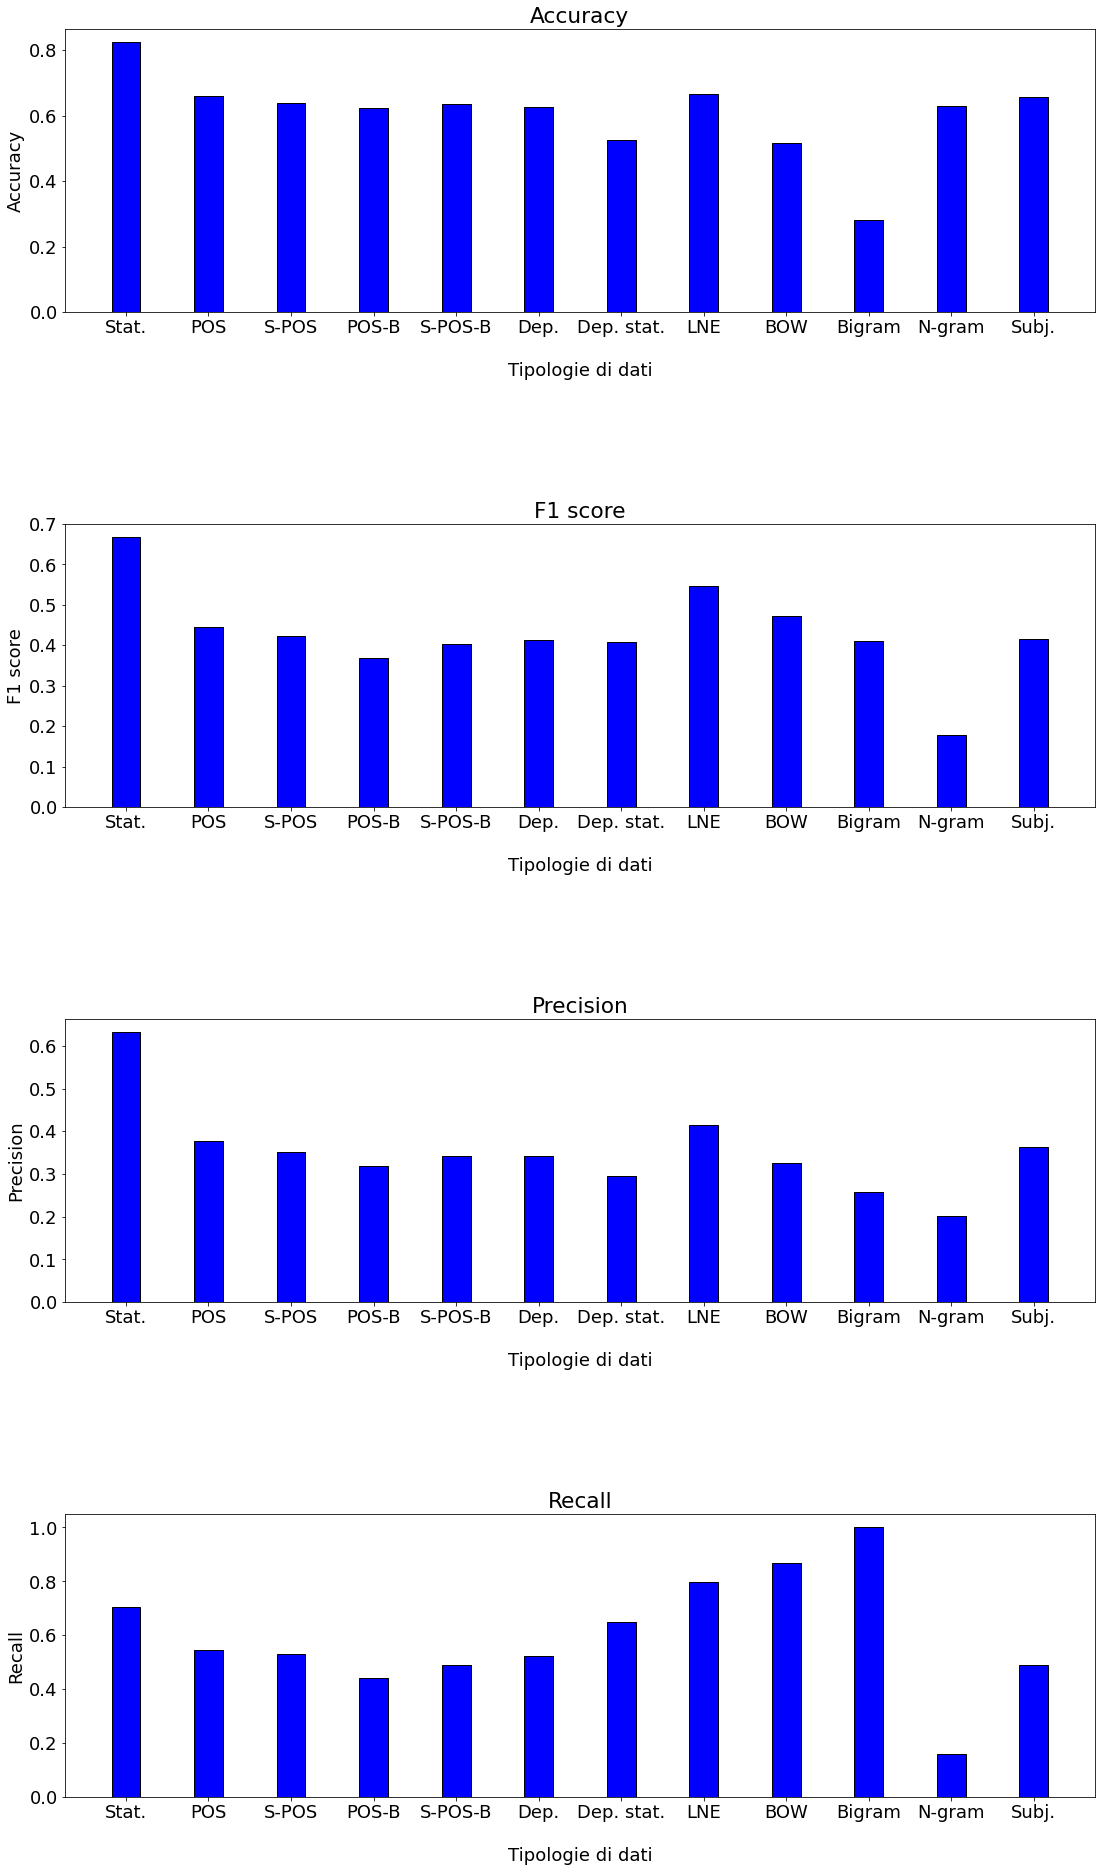

In [ ]:
# Draw the plots of the performance for the various dataset.

# Width of the bars for the graphs to draw.
barWidth = 0.35

# Plot the bar graphs.
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 30))
fig.tight_layout(pad=10.0)
data_names=["Stat.","POS","S-POS", "POS-B","S-POS-B","Dep.", "Dep. stat.","LNE","BOW","Bigram","N-gram","Subj."]
rows=["Accuracy","F1 score","Precision","Recall"]

for row,axis in zip(rows,axes.flatten()):
    axis.set_title(row)

    # Location of labels on the x axis.
    x_labels = np.arange(len(data_names))

    # Create the bars.
    axis.bar(x_labels, score[row], width = barWidth, color = 'blue', edgecolor = 'black', capsize=6)

    # Lable the axis.
    axis.set_xlabel("\nTipologie di dati")
    axis.set_xticks(x_labels)
    axis.set_xticklabels(data_names)
    axis.set_ylabel(row)

plt.show()  